In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flow_decomposer import FlowDecomposition

In [2]:
import os
import glob
import pandas as pd
import re

precomputed_dir = '/Users/iaroslav/Data/data_precomputed_compressed/'
file_paths = glob.glob(os.path.join(precomputed_dir, '*.npz'))

# Create a DataFrame.
df = pd.DataFrame(file_paths, columns=['file_path'])

# Function to extract the bird name (alphabetical part plus number) before the dash.
def extract_bird_name(path):
    file_name = path.split('/')[-1]
    # Split by '-' and take the first part.
    return file_name.split('-')[0]

# Create a new column 'bird' with the extracted name.
df['bird'] = df['file_path'].apply(extract_bird_name)

# Group by the 'bird' column and aggregate file paths into a list.
grouped = df.groupby('bird')['file_path'].apply(list).reset_index()
grouped.set_index('bird', inplace=True)

In [3]:
X = []
for file_path in grouped.loc["blue621"].to_numpy()[0]:  
    data = np.load(file_path)
    X.append(data['spectrogram'])
X = np.concatenate(X)
    


In [4]:
X = []
for file_path in np.concatenate(np.concatenate(grouped.loc[grouped.index[700:710]].to_numpy())):  
    data = np.load(file_path)
    X.append(data['spectrogram'])
X = np.concatenate(X)
    


In [ ]:
init_params = {
    "input_dim": X.shape[1], 
    "proj_dim": 2,
    "n_components": 2,        
    "num_delays": 3,
    "delay_step": 32,
    "subtract_autocorr": False,
    "device": "cpu",
    "optimizer": "Adagrad",
    "learning_rate": 0.01,
    "random_state": None
}

# Fit parameters.
fit_params = {
    "sample_size": 300,
    "library_size": 1600,
    "exclusion_rad": 30,
    "time_intv": 64,
    "num_epochs": 1000,
    "num_rand_samples": 64,
    "batch_size": 64,
    "method": "nrst_nbrs",
    "nbrs_num": 20,
    "theta": 5,
    "beta": 0,
    "optim_policy": "range",
    "mask_size": None
}

fd = FlowDecomposition(**init_params)
fd.fit(X, **fit_params)

Epoch 1/1000, Loss: 0.8162, ccm_loss: 0.8162, h_norm_loss: 0.8594
Epoch 2/1000, Loss: 0.9756, ccm_loss: 0.9756, h_norm_loss: 0.8460
Epoch 3/1000, Loss: 0.9551, ccm_loss: 0.9551, h_norm_loss: 0.8438
Epoch 4/1000, Loss: 0.8092, ccm_loss: 0.8092, h_norm_loss: 0.8448
Epoch 5/1000, Loss: 0.9783, ccm_loss: 0.9783, h_norm_loss: 0.8413
Epoch 6/1000, Loss: 0.9734, ccm_loss: 0.9734, h_norm_loss: 0.8418
Epoch 7/1000, Loss: 0.9661, ccm_loss: 0.9661, h_norm_loss: 0.8426
Epoch 8/1000, Loss: 0.9533, ccm_loss: 0.9533, h_norm_loss: 0.8434
Epoch 9/1000, Loss: 0.9213, ccm_loss: 0.9213, h_norm_loss: 0.8435
Epoch 10/1000, Loss: 0.8049, ccm_loss: 0.8049, h_norm_loss: 0.8426
Epoch 11/1000, Loss: 0.9868, ccm_loss: 0.9868, h_norm_loss: 0.8408
Epoch 12/1000, Loss: 0.9644, ccm_loss: 0.9644, h_norm_loss: 0.8412
Epoch 13/1000, Loss: 0.8375, ccm_loss: 0.8375, h_norm_loss: 0.8413
Epoch 14/1000, Loss: 0.9042, ccm_loss: 0.9042, h_norm_loss: 0.8399
Epoch 15/1000, Loss: 0.8388, ccm_loss: 0.8388, h_norm_loss: 0.8406
Epoc

In [30]:
unmixed = fd.predict(X)

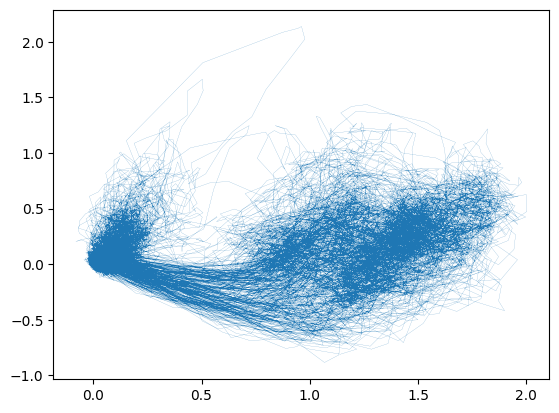

In [42]:
plt.plot(unmixed[:50000,1,0],unmixed[:50000,0,0],lw=0.1)

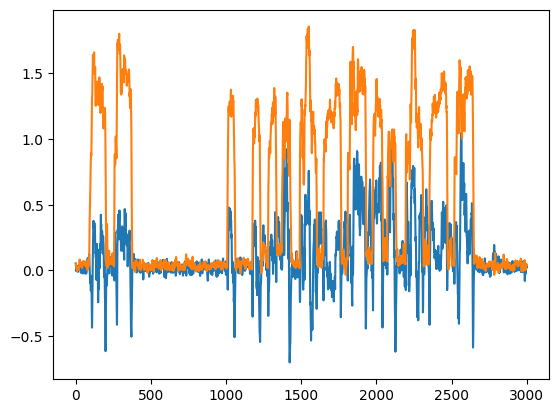

In [34]:
plt.plot(unmixed[2000:5000,0,0])
plt.plot(unmixed[2000:5000,1,0])

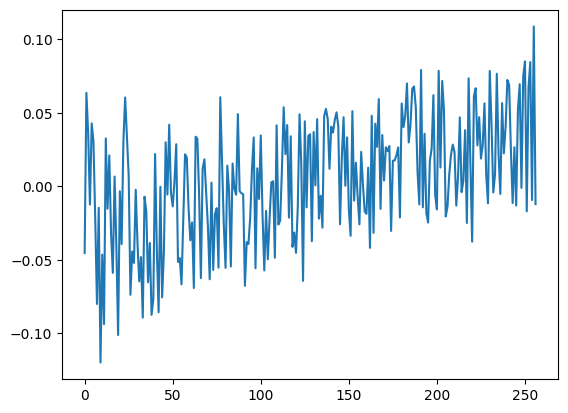

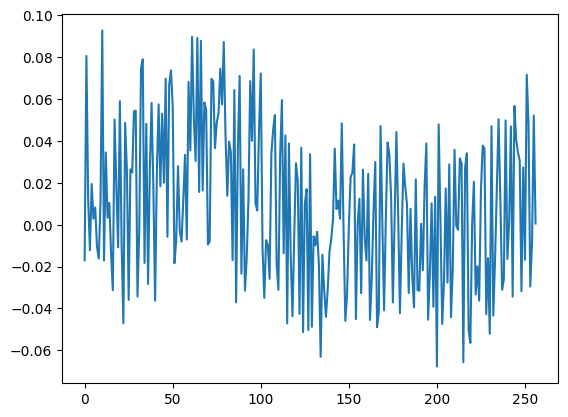

In [33]:
plt.plot((fd.model.get_weights()[:,0]))
plt.show()
plt.plot((fd.model.get_weights()[:,1]))